# **Load & Explore Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [3]:
data=pd.read_csv('/content/heart_disease_risk_dataset_earlymed.csv')
data


,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0,0.0
69996,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,56.0,1.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0
69998,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,57.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

In [5]:
print("\nMissing Values Each Column:")
print(data.isnull().sum())


Missing Values Each Column:
Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64


In [6]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
         Chest_Pain  Shortness_of_Breath       Fatigue  Palpitations  \
count  70000.000000         70000.000000  70000.000000  70000.000000   
mean       0.499229             0.500586      0.498571      0.498729   
std        0.500003             0.500003      0.500002      0.500002   
min        0.000000             0.000000      0.000000      0.000000   
25%        0.000000             0.000000      0.000000      0.000000   
50%        0.000000             1.000000      0.000000      0.000000   
75%        1.000000             1.000000      1.000000      1.000000   
max        1.000000             1.000000      1.000000      1.000000   

          Dizziness      Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  \
count  70000.000000  70000.000000        70000.000000        70000.000000   
mean       0.501414      0.498929            0.501500            0.502457   
std        0.500002      0.500002            0.500001            0.499998   
min        0.000000   

## **Data Cleaning & Preprocessing**

In [7]:
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")
data.drop_duplicates(inplace=True)

Total duplicate rows: 6245


In [8]:
label_encoders = {}
for col in data :
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le


In [9]:
def get_outlier_indices(data, columns):
    outlier_indices = []
    for col in columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_indices.extend(data[(data[col] < lower_bound) | (data[col] > upper_bound)].index.tolist())
    return list(set(outlier_indices))

numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
outlier_indices = get_outlier_indices(data, numerical_cols)
df = data.drop(index=outlier_indices)
outlier_indices = get_outlier_indices(df, numerical_cols)
print(f"Total Outliers: {len(outlier_indices)}")

Total Outliers: 0


## **Exploratory Data Analysis (EDA)**

/tmp/ipython-input-10-1213483948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart_Risk", data=df, palette="Set2")


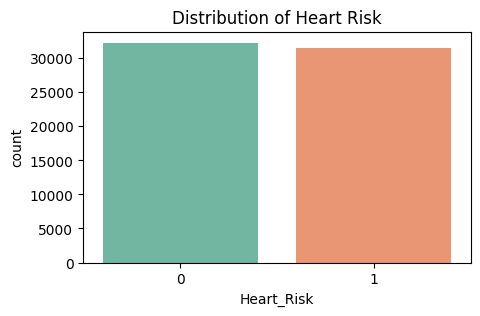

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(x="Heart_Risk", data=df, palette="Set2")
plt.title("Distribution of Heart Risk")
plt.show()


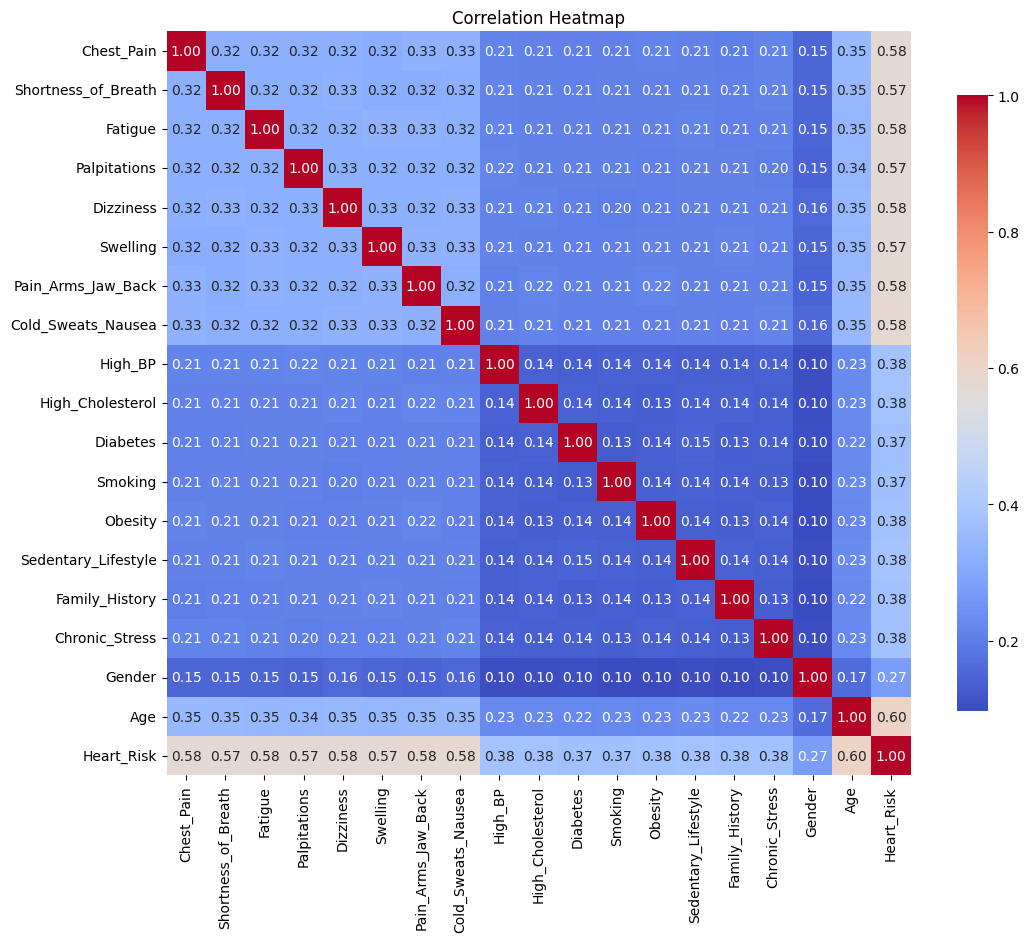

In [11]:
corr = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr, annot=True, fmt=".2f",
    cmap="coolwarm", square=True, cbar_kws={'shrink': .8}
)
plt.title("Correlation Heatmap")
plt.show()

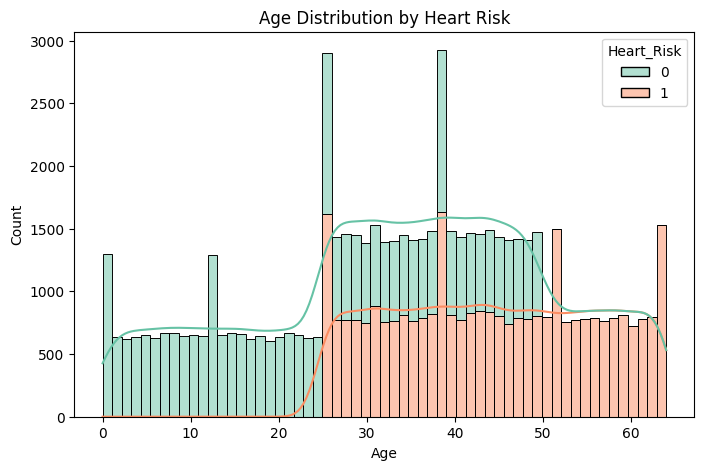

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Heart_Risk", kde=True, multiple="stack", palette="Set2")
plt.title("Age Distribution by Heart Risk")
plt.show()

/tmp/ipython-input-13-4233794310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Heart_Risk", y="Age", data=df, palette="Set2")


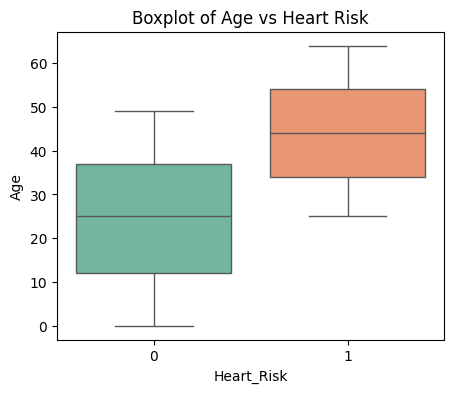

In [13]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Heart_Risk", y="Age", data=df, palette="Set2")
plt.title("Boxplot of Age vs Heart Risk")
plt.show()

## **Machine Learning**

In [14]:
X = df.drop("Heart_Risk", axis=1)
y = df["Heart_Risk"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Data splitted ")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Data splitted 
X_train shape: (51004, 18)
y_train shape: (51004,)


In [17]:
scaler = StandardScaler()
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_test["Age"] = scaler.transform(X_test[["Age"]])

joblib.dump(scaler, "age_scaler.pkl")

print(" Age column scaled and scaler saved")

 Age column scaled and scaler saved


Model trained successfully

 Test Accuracy: 99.17%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6454
           1       0.99      0.99      0.99      6297

    accuracy                           0.99     12751
   macro avg       0.99      0.99      0.99     12751
weighted avg       0.99      0.99      0.99     12751



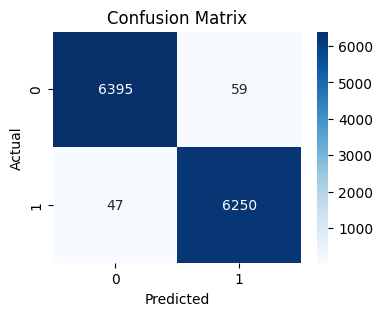

In [33]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)

print("Model trained successfully")

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n Test Accuracy: {acc*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



 Feature Importances:

Age                    0.186446
Chest_Pain             0.123412
Pain_Arms_Jaw_Back     0.116833
Cold_Sweats_Nausea     0.101512
Dizziness              0.092850
Fatigue                0.089408
Palpitations           0.073351
Shortness_of_Breath    0.066977
Swelling               0.062580
Sedentary_Lifestyle    0.013390
High_BP                0.012210
Obesity                0.010210
Family_History         0.010014
Chronic_Stress         0.009728
High_Cholesterol       0.008689
Diabetes               0.008687
Smoking                0.008570
Gender                 0.005134
dtype: float64


/tmp/ipython-input-36-4136039126.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


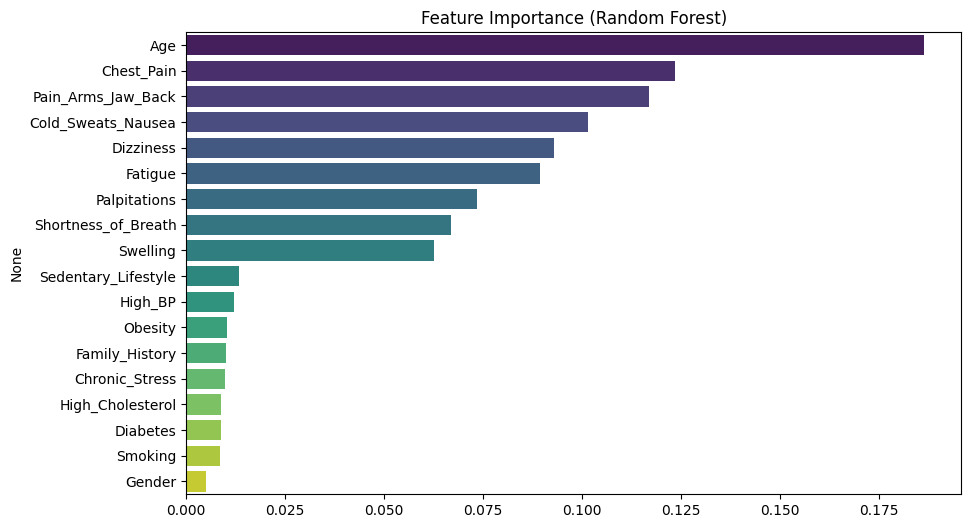

In [36]:
feature_importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\n Feature Importances:\n")
print(feature_importances)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully")
y_pred_linear = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

print(f"\nLinear Regression Metrics:")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R-squared (R2): {r2:.4f}")
print("\nLinear Regression Coefficients:")
print(linear_model.coef_)
print("\nLinear Regression Intercept:")
linear_model.intercept_

Linear Regression model trained successfully

Linear Regression Metrics:
  Mean Squared Error (MSE): 0.0321
  Root Mean Squared Error (RMSE): 0.1792
  R-squared (R2): 0.8716

Linear Regression Coefficients:
[0.1265124  0.12500784 0.12517213 0.12389772 0.12438617 0.12282323
 0.12689796 0.12670587 0.06924618 0.06729902 0.06702996 0.06721072
 0.06801714 0.07139761 0.06784848 0.06770142 0.04783571 0.0631042 ]

Linear Regression Intercept:


np.float64(-0.2991699363744202)

In [46]:
joblib.dump(model, "heart_risk_model.pkl")
joblib.dump(scaler, "age_scaler.pkl")

['age_scaler.pkl']

In [47]:
model = joblib.load("heart_risk_model.pkl")
scaler = joblib.load("age_scaler.pkl")
